In [7]:
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

In [8]:
data= pd.read_csv('3D_spatial_network.txt')

In [9]:
data.head()

,144552912,9.3498486,56.7408757,17.0527715677876
0,144552912,9.350188,56.740679,17.614840
1,144552912,9.350549,56.740544,18.083536
2,144552912,9.350806,56.740484,18.279465
3,144552912,9.351053,56.740486,18.422974
4,144552912,9.351475,56.740502,19.124889


In [10]:
data.columns=['Drop','Latitude','Longitude','Altitude']

In [11]:
data.drop('Drop', axis=1, inplace=True)

In [12]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [13]:
data['Latitude']=(data['Latitude']-data['Latitude'].mean())/data['Latitude'].std()
data['Longitude']=(data['Longitude']-data['Longitude'].mean())/data['Longitude'].std()
data['Altitude']=(data['Altitude']-data['Altitude'].mean())/data['Altitude'].std()
data.head()

,Latitude,Longitude,Altitude
0,-0.608351,-1.185165,-0.245492
1,-0.607777,-1.185628,-0.220318
2,-0.607367,-1.185835,-0.209794
3,-0.606972,-1.185829,-0.202086
4,-0.606301,-1.185774,-0.164385


In [14]:
X1=[]
X1= data['Latitude'].iloc[:]
X2=[]
X2= data['Longitude'].iloc[:]
Y=[]
Y= data['Altitude'].iloc[:]
X1_train= X1.iloc[:182809]
X1_test= X1.iloc[:78347]
X2_train= X2.iloc[:182809]
X2_test= X2.iloc[:78347]
Y_train= Y.iloc[:182809]
Y_test= Y.iloc[:78347]


In [15]:
#X1_train, X1_test, X2_train, X2_test, Y_train, Y_test= train_test_split(X1, X2, Y, test_size= 0.3)

In [336]:
# degree 1 L2 RIDGE

def Ridge_1(x1, x2, y, w0_curr=0, w1_curr=0, w2_curr=0):
    N=float(len(y))
    avg= sum(y)/len(Y)
    
    learning=0.001
    count=0
    cost_func=[]
    lamda=9
    for i in range(1000):
        y_curr= w0_curr+w1_curr*x1+w2_curr*x2
        sse=sum([data**2 
                 for data in (y-y_curr)])/N
        ssr=sum([data**2 
                 for data in (y_curr-avg)])/N
        
        cost_func.append(sse+lamda*(w0_curr**2+w1_curr**2+w2_curr**2))
        
        D_w0=(-2/N)*sum(y-y_curr)+ 2*lamda*w0_curr
        D_w1=(-2/N)*sum(x1*(y-y_curr))+ 2*lamda*w1_curr
        D_w2=(-2/N)*sum(x2*(y-y_curr))+2*lamda*w2_curr
        w0_curr=w0_curr-(learning*D_w0)
        w1_curr=w1_curr-(learning*D_w1)
        w2_curr=w2_curr-(learning*D_w2)
        w0_curr
        
    
    return ssr/(sse+ssr), math.sqrt(sse), w0_curr, w1_curr, w2_curr,cost_func

In [346]:
def Ridge_1(x1, x2, y, w0_curr=0, w1_curr=0, w2_curr=0):
    N=float(len(y))
    avg= sum(y)/len(Y)
    
    learning=0.001
    count=0
    cost_func=[]
    lamda=9
    for i in range(1000):
        y_curr= w0_curr+w1_curr*x1+w2_curr*x2
        sse=sum([data**2 
                 for data in (y-y_curr)])/N
        
        cost_func.append(sse+lamda*(w0_curr**2+w1_curr**2+w2_curr**2))
        D_w0=(-2/N)*sum(y-y_curr)+ 2*lamda*w0_curr
        D_w1=(-2/N)*sum(x1*(y-y_curr))+ 2*lamda*w1_curr
        D_w2=(-2/N)*sum(x2*(y-y_curr))+2*lamda*w2_curr
        w0_curr=w0_curr-(learning*D_w0)
        w1_curr=w1_curr-(learning*D_w1)
        w2_curr=w2_curr-(learning*D_w2)
    return cost_func

In [347]:
cost=Ridge_1(X1_train,X2_train,Y_train)


In [348]:
cost

[1.0187750627658945,
 1.0187226556310547,
 1.0186722135968176,
 1.0186236629373617,
 1.0185769326943424,
 1.0185319545733003,
 1.0184886628434031,
 1.0184469942411785,
 1.018406887877921,
 1.018368285150353,
 1.0183311296548774,
 1.0182953671049673,
 1.0182609452515525,
 1.0182278138066112,
 1.0181959243694936,
 1.018165230355963,
 1.0181356869301137,
 1.018107250938591,
 1.01807988084748,
 1.0180535366815409,
 1.0180281799654618,
 1.0180037736678567,
 1.017980282146822,
 1.0179576710977702,
 1.0179359075033418,
 1.0179149595850352,
 1.0178947967566432,
 1.0178753895794628,
 1.017856709719375,
 1.0178387299052483,
 1.017821423888988,
 1.017804766407266,
 1.0177887331445379,
 1.017773300697278,
 1.0177584465401044,
 1.0177441489923846,
 1.017730387186957,
 1.0177171410391643,
 1.0177043912178942,
 1.0176921191170412,
 1.0176803068283458,
 1.0176689371152796,
 1.017657993387766,
 1.017647459677918,
 1.0176373206167284,
 1.0176275614116141,
 1.017618167824693,
 1.0176091261519953,
 1.0176

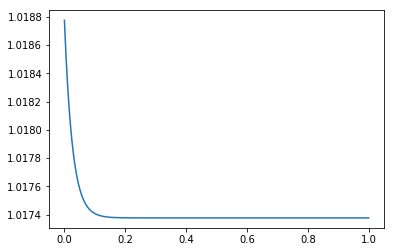

In [349]:
import pylab
iteration=np.linspace(0,1,1000)
pylab.plot(iteration,cost);

In [323]:
rr2,rmse1,w0,w1,w2=Ridge_1(X1_train,X2_train,Y_train)


###### rmse1

In [324]:
rr2

0.00011831895325731339

In [325]:
w0

0.002336313096475984

In [326]:
w1

0.007171253613937919

In [327]:
w2

-0.009540290255152663

In [328]:
rmse1

1.0079908690588009

In [33]:
rr2,rmse1,w0,w1,w2=Ridge_1(X1_test,X2_test,Y_test,0.0023363131020239323,0.007171253661183299,-0.00954029030171071)


In [34]:
rr2

6.736090785399031e-05

In [35]:
rmse1

1.030533960172263

In [36]:
w0

0.00522208282685183

In [37]:
w1

0.008658129090966611

In [38]:
w2

-0.006438931901060779

In [40]:
# degree 1 L1 LASSO
def Lasso_1(x1, x2, y, w0_curr=0, w1_curr=0, w2_curr=0, learning=0.01,count=0):
    N=float(len(y))
    avg= sum(y)/len(Y)
    arr=[]
    brr=[]
    crr=[]
    drr=[]
    lamda=9
    for i in range(1000):
        y_curr= w0_curr+w1_curr*x1+w2_curr*x2
        sse=sum([data**2 for data in (y-y_curr)])/N
        ssr=sum([data**2 for data in (y_curr-avg)])/N
    
        D_w0=(-2/N)*sum(y-y_curr)+ 2*lamda
        D_w1=(-2/N)*sum(x1*(y-y_curr))+ 2*lamda
        D_w2=(-2/N)*sum(x2*(y-y_curr))+2*lamda
        w0_curr=w0_curr-(learning*D_w0)
        w1_curr=w1_curr-(learning*D_w1)
        w2_curr=w2_curr-(learning*D_w2)
        
        arr.append(sse)
        brr.append(count)
        count=count+1
        crr.append(sse/(sse+ssr))
        drr.append(math.sqrt(sse))
    
    return ssr/(sse+ssr), math.sqrt(sse), w0_curr, w1_curr, w2_curr

In [350]:
def Lassp_1_cost(x1, x2, y, w0_curr=0, w1_curr=0, w2_curr=0):
    N=float(len(y))
    avg= sum(y)/len(Y)
    
    learning=0.001
    count=0
    cost_func=[]
    lamda=9
    for i in range(1000):
        y_curr= w0_curr+w1_curr*x1+w2_curr*x2
        sse=sum([data**2 
                 for data in (y-y_curr)])/N
        
        cost_func.append(sse+lamda*(|w0_curr|+|w1_curr|+|w2_curr|))
        D_w0=(-2/N)*sum(y-y_curr)+ 2*lamda
        D_w1=(-2/N)*sum(x1*(y-y_curr))+ 2*lamda
        D_w2=(-2/N)*sum(x2*(y-y_curr))+2*lamda
        w0_curr=w0_curr-(learning*D_w0)
        w1_curr=w1_curr-(learning*D_w1)
        w2_curr=w2_curr-(learning*D_w2)
        

    return cost_func

SyntaxError: invalid syntax (<ipython-input-350-b56998a42366>, line 14)

In [41]:
rr2, rmse1, w0, w1, w2=Lasso_1(X1_train,X2_train,Y_train)#Train data


In [42]:
rr2

0.4985528815366945

In [43]:
rmse1

13.94172707266491

In [44]:
w0

-9.362483235727861

In [45]:
w1

-6.537895301780843

In [46]:
w2

-5.567852915049161

In [47]:
rr2,rmse1,w0,w1,w2=lin_1_Lasso(X1_test,X2_test,Y_test,-9.362483235727861,-6.537895301780843,-5.567852915049161)#Test data


In [48]:
rr2

0.497338127729248

In [49]:
rmse1

14.016972373035886

In [50]:
w0

-9.230759282507348

In [51]:
w1

-5.979521910680388

In [52]:
w2

-6.43621637175436

In [258]:
# degree 6 L2 Ridge

def Ridge_6(x1, x2, y, w0_curr=0, w1_curr=0, w2_curr=0, w3_curr=0,w4_curr=0,w5_curr=0, w6_curr=0, w7_curr=0, w8_curr=0, w9_curr=0,w10_curr=0,w11_curr=0,w12_curr=0,w13_curr=0,w14_curr=0,w15_curr=0,w16_curr=0,w17_curr=0,w18_curr=0,w19_curr=0,w20_curr=0,w21_curr=0,w22_curr=0,w23_curr=0,w24_curr=0,w25_curr=0,w26_curr=0,w27_curr=0,learning=0.0001):
    N= len(y)
    avg= sum(y)/len(Y)
    x3= x1*x1
    x4= x2*x2
    x5= x1*x2
    x6= x1*x1*x2
    x7= x2*x2*x1
    x8= x1*x1*x1
    x9= x2*x2*x2
    x10= x4*x4
    x11= x6*x1
    x12= x7*x2
    x13= x8*x1
    x14= x9*x2
    x15= x8*x4
    x16= x9*x3
    x17= x13*x2
    x18= x14*x1
    x19= x13*x1
    x20= x14*x2
    x21= x8*x9
    x22= x13*x4
    x23= x14*x3
    x24= x19*x2
    x25= x20*x1
    x26= x19*x1
    x27= x20*x2
    lamda=9
    for i in range(1000):
        y_curr= w0_curr+w1_curr*x1+w2_curr*x2+w3_curr*x3+w4_curr*x4+w5_curr*x5+w6_curr*x6+w7_curr*x7+w8_curr*x8+w9_curr*x9+w10_curr*x10+w11_curr*x11+w12_curr*x12+w13_curr*x13+w14_curr*x14+w15_curr*x15+w16_curr*x16+w17_curr*x17+w18_curr*x18+w19_curr*x19+w20_curr*x20+w21_curr*x21+w22_curr*x22+w23_curr*x23+w24_curr*x24+w25_curr*x25+w26_curr*x26+w27_curr*x27
        sse=sum([data**2
                 for data in (y-y_curr)])/N
        ssr=sum([data**2 
               for data in (y_curr-avg)])/N
        D_w0=(-2/N)*sum(y-y_curr)+ 2*lamda*w0_curr
        D_w1=(-2/N)*sum(x1*(y-y_curr))+ 2*lamda*w1_curr
        D_w2=(-2/N)*sum(x2*(y-y_curr))+ 2*lamda*w2_curr
        D_w3=(-2/N)*sum(x3*(y-y_curr))+ 2*lamda*w3_curr
        D_w4=(-2/N)*sum(x4*(y-y_curr))+ 2*lamda*w4_curr
        D_w5=(-2/N)*sum(x5*(y-y_curr))+ 2*lamda*w5_curr
        D_w6=(-2/N)*sum(x6*(y-y_curr))+ 2*lamda*w6_curr
        D_w7=(-2/N)*sum(x7*(y-y_curr))+ 2*lamda*w7_curr
        D_w8=(-2/N)*sum(x8*(y-y_curr))+ 2*lamda*w8_curr
        D_w9=(-2/N)*sum(x9*(y-y_curr))+ 2*lamda*w9_curr
        D_w10=(-2/N)*sum(x10*(y-y_curr))+ 2*lamda*w10_curr
        D_w11=(-2/N)*sum(x11*(y-y_curr))+ 2*lamda*w11_curr
        D_w12=(-2/N)*sum(x12*(y-y_curr))+ 2*lamda*w12_curr
        D_w13=(-2/N)*sum(x13*(y-y_curr))+ 2*lamda*w13_curr
        D_w14=(-2/N)*sum(x14*(y-y_curr))+ 2*lamda*w14_curr
        D_w15=(-2/N)*sum(x15*(y-y_curr))+ 2*lamda*w15_curr
        D_w16=(-2/N)*sum(x16*(y-y_curr))+ 2*lamda*w16_curr
        D_w17=(-2/N)*sum(x17*(y-y_curr))+ 2*lamda*w17_curr
        D_w18=(-2/N)*sum(x18*(y-y_curr))+ 2*lamda*w18_curr
        D_w19=(-2/N)*sum(x19*(y-y_curr))+ 2*lamda*w19_curr
        D_w20=(-2/N)*sum(x20*(y-y_curr))+ 2*lamda*w20_curr
        D_w21=(-2/N)*sum(x21*(y-y_curr))+ 2*lamda*w21_curr
        D_w22=(-2/N)*sum(x22*(y-y_curr))+ 2*lamda*w22_curr
        D_w23=(-2/N)*sum(x23*(y-y_curr))+ 2*lamda*w23_curr
        D_w24=(-2/N)*sum(x24*(y-y_curr))+ 2*lamda*w24_curr
        D_w25=(-2/N)*sum(x25*(y-y_curr))+ 2*lamda*w25_curr
        D_w26=(-2/N)*sum(x26*(y-y_curr))+ 2*lamda*w26_curr
        D_w27=(-2/N)*sum(x27*(y-y_curr))+ 2*lamda*w27_curr
        
                
        w0_curr=w0_curr-(learning*D_w0)
        w1_curr=w1_curr-(learning*D_w1)
        w2_curr=w2_curr-(learning*D_w2)
        w3_curr=w3_curr-(learning*D_w3)
        w4_curr=w4_curr-(learning*D_w4)
        w5_curr=w5_curr-(learning*D_w5)
        w6_curr=w6_curr-(learning*D_w6)
        w7_curr=w7_curr-(learning*D_w7)
        w8_curr=w8_curr-(learning*D_w8)
        w9_curr=w9_curr-(learning*D_w9)
        w10_curr=w10_curr-(learning*D_w10)
        w11_curr=w11_curr-(learning*D_w11)
        w12_curr=w12_curr-(learning*D_w12)
        w13_curr=w13_curr-(learning*D_w13)
        w14_curr=w14_curr-(learning*D_w14)
        w15_curr=w15_curr-(learning*D_w15)
        w16_curr=w16_curr-(learning*D_w16)
        w17_curr=w17_curr-(learning*D_w17)
        w18_curr=w18_curr-(learning*D_w18)
        w19_curr=w19_curr-(learning*D_w19)
        w20_curr=w20_curr-(learning*D_w20)
        w21_curr=w20_curr-(learning*D_w21)
        w22_curr=w20_curr-(learning*D_w22)
        w23_curr=w20_curr-(learning*D_w23)
        w24_curr=w20_curr-(learning*D_w24)
        w25_curr=w20_curr-(learning*D_w25)
        w26_curr=w20_curr-(learning*D_w26)
        w27_curr=w20_curr-(learning*D_w27)
            
        
    return sse/(sse+ssr),math.sqrt(sse),w0_curr, w1_curr, w2_curr, w3_curr, w4_curr, w5_curr, w6_curr, w7_curr, w8_curr, w9_curr, w10_curr, w11_curr, w12_curr, w13_curr, w14_curr, w15_curr, w16_curr, w17_curr, w18_curr, w19_curr, w20_curr, w21_curr, w22_curr, w23_curr, w24_curr, w25_curr, w26_curr, w27_curr

In [138]:
rr2,rmse1,w0_curr, w1_curr, w2_curr, w3_curr, w4_curr, w5_curr, w6_curr, w7_curr, w8_curr, w9_curr, w10_curr, w11_curr, w12_curr, w13_curr, w14_curr, w15_curr, w16_curr, w17_curr, w18_curr, w19_curr, w20_curr, w21_curr, w22_curr, w23_curr, w24_curr, w25_curr, w26_curr, w27_curr= Ridge_6(X1_train,X2_train,Y_train)

In [139]:
rr2

0.9227738082826966

In [140]:
rmse1

0.9763918526698111

In [141]:
w0_curr



0.004422348206681807

In [142]:
w1_curr


0.008861785982315911

In [143]:
w2_curr


-0.0013396265544481942

In [144]:
w3_curr


0.0005232901968194099

In [145]:
w4_curr

0.01544400915946711

In [146]:
w5_curr 


0.005664238755928369

In [147]:
w6_curr


0.004044317247380639

In [148]:
w7_curr

0.004719682046403276

In [149]:
w8_curr


0.0034027689309101545

In [150]:
w9_curr

-0.0064368213703902

In [151]:
w10_curr

0.024450533006485687

In [152]:
w11_curr


0.012932563574528355

In [153]:
w12_curr


0.007998069672042057

In [154]:
w13_curr


0.013302804759043226

In [155]:
w14_curr

0.024450533006485684

In [156]:
w15_curr 


-0.008341948457650208

In [157]:
w16_curr 


-0.00043366071153623915

In [158]:
w17_curr 


-0.011733503591989396

In [159]:
w18_curr 


0.005123538762527979

In [160]:
w19_curr 


-0.012208122719078021

In [161]:
w20_curr

-0.008506424354734258

In [162]:
w21_curr 


-0.00842565319372756

In [163]:
w22_curr 


-0.008402923403926918

In [164]:
w23_curr 


-0.008441229154490002

In [165]:
w24_curr 


-0.008347812431455215

In [166]:
w25_curr 


-0.008433053509765854

In [167]:
w26_curr 


-0.008273446211002348

In [168]:
w27_curr

-0.008367259723064477

In [259]:
rr2,rmse1,w0_curr, w1_curr, w2_curr, w3_curr, w4_curr, w5_curr, w6_curr, w7_curr, w8_curr, w9_curr, w10_curr, w11_curr, w12_curr, w13_curr, w14_curr, w15_curr, w16_curr, w17_curr, w18_curr, w19_curr, w20_curr, w21_curr, w22_curr, w23_curr, w24_curr, w25_curr, w26_curr, w27_curr= Ridge_6(X1_test,X2_test,Y_test,0.004422348206681807,0.008861785982315911,-0.0013396265544481942,0.0005232901968194099,0.01544400915946711,0.005664238755928369,0.004044317247380639,0.004719682046403276,0.0034027689309101545,-0.0064368213703902,0.024450533006485687,0.012932563574528355,0.007998069672042057,0.013302804759043226,0.024450533006485684,-0.008341948457650208,-0.00043366071153623915,-0.011733503591989396,0.005123538762527979,-0.012208122719078021,-0.008506424354734258,-0.00842565319372756,-0.008402923403926918,-0.008441229154490002,-0.008347812431455215,-0.008433053509765854,-0.008273446211002348,-0.008367259723064477)

In [293]:
rr2

0.9324791398080852

In [294]:
rmse1

0.9962679419847585

In [295]:
w0_curr


0.005404272416920165

In [296]:
w1_curr


0.010534549440222729

In [297]:
w2_curr


-0.0002348893701707332

In [298]:
w3_curr


0.00037974272164817446

In [299]:
w4_curr


0.019288330664005406

In [300]:
w5_curr 


0.007581559467233649

In [301]:
w6_curr


0.005890402950422152

In [302]:
w7_curr


0.006474591102091815

In [303]:
w8_curr


0.004566081606362514

In [304]:
w9_curr


-0.006426322916455818

In [305]:
w10_curr


0.025789746737166205

In [306]:
w11_curr


0.014999495997844529

In [307]:
w12_curr


0.009747855339623768

In [308]:
w13_curr


0.011667690103531941

In [309]:
w14_curr 


0.025789746737166205

In [310]:
w15_curr 


-0.0097843665245738

In [311]:
w16_curr 


0.0005108769196947408

In [312]:
w17_curr 


-0.013962791863713048

In [313]:
w18_curr 


0.0064010101663187395

In [314]:
w19_curr 


-0.013378825889907195

In [315]:
w20_curr 


-0.00870829142497508

In [316]:
w21_curr

-0.008629971466292135

In [317]:
w22_curr 


-0.008609408144212195

In [318]:
w23_curr

-0.008646629639134762

In [319]:
 
w24_curr

-0.008560330471312909

In [320]:
 
w25_curr

-0.008641076302663694

In [321]:
 
w26_curr

-0.008515744467413867

In [322]:
 
w27_curr

-0.008594407662069271

In [291]:
# degree 6 L1 Lasso

def Lasso_6(x1, x2, y, w0_curr=0, w1_curr=0, w2_curr=0, w3_curr=0,w4_curr=0,w5_curr=0, w6_curr=0, w7_curr=0, w8_curr=0, w9_curr=0,w10_curr=0,w11_curr=0,w12_curr=0,w13_curr=0,w14_curr=0,w15_curr=0,w16_curr=0,w17_curr=0,w18_curr=0,w19_curr=0,w20_curr=0,w21_curr=0,w22_curr=0,w23_curr=0,w24_curr=0,w25_curr=0,w26_curr=0,w27_curr=0,learning=0.0001):
    N= len(y)
    avg= sum(y)/len(Y)
    x3= x1*x1
    x4= x2*x2
    x5= x1*x2
    x6= x1*x1*x2
    x7= x2*x2*x1
    x8= x1*x1*x1
    x9= x2*x2*x2
    x10= x4*x4
    x11= x6*x1
    x12= x7*x2
    x13= x8*x1
    x14= x9*x2
    x15= x8*x4
    x16= x9*x3
    x17= x13*x2
    x18= x14*x1
    x19= x13*x1
    x20= x14*x2
    x21= x8*x9
    x22= x13*x4
    x23= x14*x3
    x24= x19*x2
    x25= x20*x1
    x26= x19*x1
    x27= x20*x2
    lamda=9
    for i in range(1000):
        y_curr= w0_curr+w1_curr*x1+w2_curr*x2+w3_curr*x3+w4_curr*x4+w5_curr*x5+w6_curr*x6+w7_curr*x7+w8_curr*x8+w9_curr*x9+w10_curr*x10+w11_curr*x11+w12_curr*x12+w13_curr*x13+w14_curr*x14+w15_curr*x15+w16_curr*x16+w17_curr*x17+w18_curr*x18+w19_curr*x19+w20_curr*x20+w21_curr*x21+w22_curr*x22+w23_curr*x23+w24_curr*x24+w25_curr*x25+w26_curr*x26+w27_curr*x27
        sse=sum([data**2
                 for data in (y-y_curr)])/N
        ssr=sum([data**2 
               for data in (y_curr-avg)])/N
        D_w0=(-2/N)*sum(y-y_curr)+ 2*lamda*w0_curr
        D_w1=(-2/N)*sum(x1*(y-y_curr))+ 2*lamda
        D_w2=(-2/N)*sum(x2*(y-y_curr))+ 2*lamda
        D_w3=(-2/N)*sum(x3*(y-y_curr))+ 2*lamda
        D_w4=(-2/N)*sum(x4*(y-y_curr))+ 2*lamda
        D_w5=(-2/N)*sum(x5*(y-y_curr))+ 2*lamda
        D_w6=(-2/N)*sum(x6*(y-y_curr))+ 2*lamda
        D_w7=(-2/N)*sum(x7*(y-y_curr))+ 2*lamda
        D_w8=(-2/N)*sum(x8*(y-y_curr))+ 2*lamda
        D_w9=(-2/N)*sum(x9*(y-y_curr))+ 2*lamda
        D_w10=(-2/N)*sum(x10*(y-y_curr))+ 2*lamda
        D_w11=(-2/N)*sum(x11*(y-y_curr))+ 2*lamda
        D_w12=(-2/N)*sum(x12*(y-y_curr))+ 2*lamda
        D_w13=(-2/N)*sum(x13*(y-y_curr))+ 2*lamda
        D_w14=(-2/N)*sum(x14*(y-y_curr))+ 2*lamda
        D_w15=(-2/N)*sum(x15*(y-y_curr))+ 2*lamda
        D_w16=(-2/N)*sum(x16*(y-y_curr))+ 2*lamda
        D_w17=(-2/N)*sum(x17*(y-y_curr))+ 2*lamda
        D_w18=(-2/N)*sum(x18*(y-y_curr))+ 2*lamda
        D_w19=(-2/N)*sum(x19*(y-y_curr))+ 2*lamda
        D_w20=(-2/N)*sum(x20*(y-y_curr))+ 2*lamda
        D_w21=(-2/N)*sum(x21*(y-y_curr))+ 2*lamda
        D_w22=(-2/N)*sum(x22*(y-y_curr))+ 2*lamda
        D_w23=(-2/N)*sum(x23*(y-y_curr))+ 2*lamda
        D_w24=(-2/N)*sum(x24*(y-y_curr))+ 2*lamda
        D_w25=(-2/N)*sum(x25*(y-y_curr))+ 2*lamda
        D_w26=(-2/N)*sum(x26*(y-y_curr))+ 2*lamda
        D_w27=(-2/N)*sum(x27*(y-y_curr))+ 2*lamda
        
                
        w0_curr=w0_curr-(learning*D_w0)
        w1_curr=w1_curr-(learning*D_w1)
        w2_curr=w2_curr-(learning*D_w2)
        w3_curr=w3_curr-(learning*D_w3)
        w4_curr=w4_curr-(learning*D_w4)
        w5_curr=w5_curr-(learning*D_w5)
        w6_curr=w6_curr-(learning*D_w6)
        w7_curr=w7_curr-(learning*D_w7)
        w8_curr=w8_curr-(learning*D_w8)
        w9_curr=w9_curr-(learning*D_w9)
        w10_curr=w10_curr-(learning*D_w10)
        w11_curr=w11_curr-(learning*D_w11)
        w12_curr=w12_curr-(learning*D_w12)
        w13_curr=w13_curr-(learning*D_w13)
        w14_curr=w14_curr-(learning*D_w14)
        w15_curr=w15_curr-(learning*D_w15)
        w16_curr=w16_curr-(learning*D_w16)
        w17_curr=w17_curr-(learning*D_w17)
        w18_curr=w18_curr-(learning*D_w18)
        w19_curr=w19_curr-(learning*D_w19)
        w20_curr=w20_curr-(learning*D_w20)
        w21_curr=w20_curr-(learning*D_w21)
        w22_curr=w20_curr-(learning*D_w22)
        w23_curr=w20_curr-(learning*D_w23)
        w24_curr=w20_curr-(learning*D_w24)
        w25_curr=w20_curr-(learning*D_w25)
        w26_curr=w20_curr-(learning*D_w26)
        w27_curr=w20_curr-(learning*D_w27)
            
        
    return sse/(sse+ssr),math.sqrt(sse),w0_curr, w1_curr, w2_curr, w3_curr, w4_curr, w5_curr, w6_curr, w7_curr, w8_curr, w9_curr, w10_curr, w11_curr, w12_curr, w13_curr, w14_curr, w15_curr, w16_curr, w17_curr, w18_curr, w19_curr, w20_curr, w21_curr, w22_curr, w23_curr, w24_curr, w25_curr, w26_curr, w27_curr

In [292]:
rr2,rmse1,w0_curr, w1_curr, w2_curr, w3_curr, w4_curr, w5_curr, w6_curr, w7_curr, w8_curr, w9_curr, w10_curr, w11_curr, w12_curr, w13_curr, w14_curr, w15_curr, w16_curr, w17_curr, w18_curr, w19_curr, w20_curr, w21_curr, w22_curr, w23_curr, w24_curr, w25_curr, w26_curr, w27_curr=Lasso_6(X1_train,X2_train,Y_train)

KeyboardInterrupt: 

In [ ]:
rr2

In [ ]:
rmse1

In [ ]:
w0_curr


In [ ]:
w1_curr


In [ ]:
w2_curr


In [ ]:
w3_curr


In [ ]:
w4_curr


In [ ]:
w5_curr 


In [ ]:
w6_curr


In [ ]:
w7_curr


In [ ]:
w8_curr


In [ ]:
w9_curr


In [ ]:
w10_curr


In [ ]:
w11_curr


In [186]:
w12_curr


-1.4543965756648862

In [187]:
w13_curr


-1.6360766206106374

In [188]:
w14_curr 


-0.6105613877813417

In [189]:
w15_curr 


0.08509192210291763

In [190]:
w16_curr 


-0.1844653775204185

In [191]:
w17_curr 


0.4939030808582798

In [192]:
w18_curr 


-0.1169161335149536

In [193]:
w19_curr 


0.39164138043079355

In [194]:
w20_curr 


0.36076433104615907

In [195]:
w21_curr

0.35646213015927186

In [196]:
w22_curr 


0.3553389940718674

In [197]:
w23_curr

0.35736017122670116

In [198]:
 
w24_curr

0.3543299800242629

In [199]:
 
w25_curr

0.35811184836734966

In [200]:
 
w26_curr

0.3559634981220863

In [201]:
 
w27_curr

0.3600372624810498

In [204]:
rr2,rmse1,w0_curr, w1_curr, w2_curr, w3_curr, w4_curr, w5_curr, w6_curr, w7_curr, w8_curr, w9_curr, w10_curr, w11_curr, w12_curr, w13_curr, w14_curr, w15_curr, w16_curr, w17_curr, w18_curr, w19_curr, w20_curr, w21_curr, w22_curr, w23_curr, w24_curr, w25_curr, w26_curr, w27_curr=Lasso_6(X1_test,X2_test,Y_test,0.2681308684436814,-1.4958242865261162,-1.3732711707677232,-1.3732711707677232,-1.1562716688695138,-1.4637843804465744,-1.1421949146399288,-1.037544326206513,-1.33891466317565,-0.8182911181359552,-0.6105613877813417,-2.0072274425686056,-1.4543965756648862,-1.6360766206106374,-0.6105613877813417,0.08509192210291763,-0.1844653775204185,0.4939030808582798,-0.1169161335149536,0.39164138043079355,0.36076433104615907,0.35646213015927186,0.3553389940718674,0.35736017122670116,0.3543299800242629,0.35811184836734966,0.3559634981220863,0.3600372624810498)

In [205]:
rr2

0.5076791275541308

In [212]:
rmse1

12.57553008977919

In [213]:
w0_curr


0.5236907988954538

In [214]:
w1_curr


-2.7481949105816392

In [215]:
w2_curr


-2.2894926624228553

In [216]:
w3_curr


-2.1526963075099013

In [217]:
w4_curr


-1.727450697383507

In [218]:
w5_curr 


-2.4940692139952034

In [219]:
w6_curr


-2.0905626382207068

In [220]:
w7_curr


-1.7918999823044899

In [221]:
w8_curr


-2.6504839063347645

In [222]:
w9_curr


-1.1040467148517155

In [223]:
w10_curr


-0.7906521074311006

In [224]:
w11_curr


-3.623596318663164

In [225]:
w12_curr


-2.784352543070117

In [226]:
w13_curr


-2.1599764294414867

In [227]:
w14_curr 


-0.7906521074311007

In [228]:
w15_curr 


0.48728848380809414

In [229]:
w16_curr 


-0.28596726613375006

In [230]:
w17_curr 


1.3601061477636964

In [231]:
w18_curr 


-0.4189757063507896

In [232]:
w19_curr 


0.6340389312418814

In [233]:
w20_curr 


0.5857804526914077

In [234]:
w21_curr

0.5810449702903234

In [235]:
w22_curr 


0.5802622454163668

In [236]:
w23_curr

0.5815089952861249

In [237]:
 
w24_curr

0.5797398562793776

In [238]:
 
w25_curr

0.5817844276710669

In [239]:
 
w26_curr

0.5819806953230124

In [240]:
 
w27_curr

0.583266647914061